In [1]:
import pandas as pd 
data = pd.read_csv("data.csv") 

In [2]:
import numpy as np
data_np =data.values
# removing timestamp
data_np=data_np[:,1:]

for i in range(data_np.shape[0]):
    for j in range(data_np.shape[1]):
        data_np[i][j]=1 if data_np[i][j]=="Yes" else 0 if data_np[i][j]=="No" else data_np[i][j]
        data_np[i][j]=1 if data_np[i][j]=="Male" else 0 if data_np[i][j]=="Female" else data_np[i][j]


In [3]:
data_np

array([[96.0, 92.8, 9.77, 9.63, 9.42, 9.14, 9.0, 9.3, 9.25, 1, 1, 6.0, 5,
        3.0, 1.0, 0, 0, 0],
       [87.2, 79.54, 7.77, 7.81, 8.48, 8.48, 8.27, 8.35, 8.08, 1, 0, 6.0,
        5, 0.0, 4.0, 0, 0, 0],
       [91.8, 87.38, 7.31, 7.18, 8.7, 7.62, 7.18, 8.04, 8.46, 1, 0, 2.0,
        4, 4.0, 6.0, 0, 0, 0],
       [94.4, 89.5, 8.46, 9.31, 8.8, 8.5, 8.2, 8.02, 8.75, 0, 0, 2.0, 4,
        2.0, 2.0, 0, 1, 0],
       [92.2, 85.6, 9.27, 9.73, 9.22, 9.29, 8.45, 8.7, 8.88, 1, 1, 1.0,
        3, 2.5, 2.0, 0, 0, 1],
       [94.4, 88.15, 9.58, 9.35, 9.17, 9.1, 8.86, 9.3, 9.1, 1, 0, 5.0, 3,
        3.0, 2.0, 0, 0, 1],
       [93.8, 85.23, 8.77, 9.58, 9.17, 8.81, 8.23, 8.52, 8.79, 1, 0, 4.0,
        1, 3.0, 4.0, 0, 0, 1],
       [88.0, 83.34, 9.08, 8.88, 9.09, 8.71, 7.64, 7.65, 7.67, 1, 0, 7.0,
        4, 1.0, 5.0, 0, 1, 0],
       [93.2, 89.8, 8.62, 9.19, 8.26, 8.19, 7.91, 8.91, 8.54, 0, 0, 2.0,
        4, 2.0, 3.0, 0, 1, 1],
       [93.6, 89.69, 9.38, 9.27, 8.83, 9.14, 8.18, 8.57, 9.13, 1, 0, 

In [81]:
y= data_np[:,-1]
x= data_np[:,:-1]
x=x.astype(float)
y=y.astype(float)
x=np.c_[  np.ones(len(x)) ,x ]   

train_x=x[:int(len(x)*0.8),:]
train_y=y[:int(len(x)*0.8)]
test_x=x[int(len(x)*0.8):,:]
test_y=y[int(len(x)*0.8):]


In [91]:

np.random.seed(0)
coef=np.random.rand(len(x[0]))


In [83]:
def sigmoid(x):
    epsilon=1e-10
    return 1/(1+(np.exp(-x)+epsilon))

In [84]:

def cost(x,coef,y):
    y_pred=sigmoid(np.matmul(x,coef))
    
    return np.sum(-y * np.log(y_pred)-(1-y)*np.log(1-y_pred))

In [181]:
def descent(x,coef,y,alpha,num_itr):
    prev_cost=0
    new_coef=np.empty(coef.shape)
    itr=0
    epsilon=1e-10
    while(itr<num_itr):

        y_pred=sigmoid(np.matmul(x,coef))
        coef-= ((alpha/len(x))* np.sum((y_pred-y).reshape(y_pred.shape[0],1)*x,axis=0))

        cur_cost=cost(x,coef,y)
#         print(cur_cost)
        itr+=1

    return cur_cost

In [189]:

np.random.seed(0)
coef=np.random.rand(len(x[0]))

print("Final cost:",descent(train_x,coef,train_y,alpha=0.0005,num_itr=100000))
print("Final weights:",coef)


Final cost: 10.919417763356995
Final weights: [ 0.44718966  0.12050311 -0.20793215  1.69712972  0.59257348 -0.22138163
 -0.7292225  -0.58792996  1.51298951 -0.95218579  0.35043602  0.19947636
 -0.20715639 -1.26189539 -0.20236807 -0.01381464 -0.61662993  0.45425295]


In [190]:
print("BCE loss=",cost(test_x,coef,test_y))

BCE loss= 6.251683064309483


In [191]:
out=sigmoid(np.matmul(test_x,coef))
pred=[]
for i in range(len(test_x)):
#     pred.append((sigmoid(test_x[i]*coef)))
#     print(out[i])
    pred.append(1 if out[i]>0.5 else 0)
    print("actual value:",test_y[i],"prdected value:",pred[i])

# pred=np.array(pred)


actual value: 0.0 prdected value: 1
actual value: 0.0 prdected value: 0
actual value: 0.0 prdected value: 0
actual value: 0.0 prdected value: 1
actual value: 0.0 prdected value: 1
actual value: 1.0 prdected value: 1
actual value: 0.0 prdected value: 0
actual value: 1.0 prdected value: 1


In [195]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
print(confusion_matrix(test_y,pred))
precision_recall_fscore_support(test_y, pred, average='macro')



[[3 3]
 [0 2]]


(0.7, 0.75, 0.6190476190476191, None)

In [196]:
feature_importance=[]
for i in range(len(coef)):
    permute_x=test_x.copy()
    np.random.shuffle(permute_x[:,i])
#     pred=sigmoid(np.matmul(permute_x,coef))
    feature_importance.append(cost(permute_x,coef,test_y))


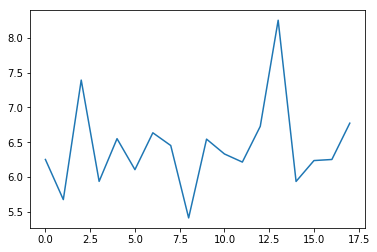

In [197]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(feature_importance)

In [198]:
feature_importance

[6.251683064309487,
 5.675919628458772,
 7.391506819560198,
 5.937580607399042,
 6.550472047099572,
 6.105946502364965,
 6.634850984721895,
 6.452132916205764,
 5.41281357076784,
 6.544028914355359,
 6.330950779603869,
 6.214425398461035,
 6.727721424581212,
 8.250687903049435,
 5.936362068518319,
 6.236274323142061,
 6.251683064309487,
 6.772949762647013]

In [200]:
important_features=[]
for i,importance in enumerate(feature_importance): 
    if importance>=6.5:
        important_features.append(i)
important_features

[2, 4, 6, 9, 12, 13, 17]

In [165]:
important_features=[0]+important_features

In [201]:
# creating new test and train set with only important features
train_x_new=train_x[:,important_features]
test_x_new=test_x[:,important_features]
test_x_new

array([[84.  ,  7.79,  8.  ,  8.79,  3.  ,  4.  ,  1.  ],
       [83.85,  8.08,  9.19,  8.88,  2.5 ,  5.  ,  1.  ],
       [82.46,  8.5 ,  8.48,  8.38,  3.  ,  4.  ,  1.  ],
       [82.15,  8.46,  8.43,  8.25,  4.  ,  3.  ,  0.  ],
       [93.  ,  9.85,  9.2 ,  8.81,  4.  ,  3.  ,  1.  ],
       [76.  ,  7.73,  8.1 ,  8.29,  3.  ,  3.  ,  1.  ],
       [86.4 ,  8.12,  9.05,  9.21,  3.  ,  4.  ,  0.  ],
       [84.  ,  8.42,  8.95,  8.75,  1.  ,  3.  ,  1.  ]])

In [213]:
np.random.seed(0)
coef=np.random.rand(len(train_x_new[0]))
print("Final cost:",descent(train_x_new,coef,train_y,alpha=0.001,num_itr=100000))
print("Final weights:",coef)

Final cost: 14.615215457039454
Final weights: [-0.06425271  1.77392336 -0.02817125 -0.62793423 -0.1579665  -0.97661755
 -0.73775573]


In [204]:
print("BCE loss=",cost(test_x_new,coef,test_y))

BCE loss= 5.011270497242869


In [205]:
out=sigmoid(np.matmul(test_x_new,coef))
pred=[]
for i in range(len(test_x_new)):
#     pred.append((sigmoid(test_x[i]*coef)))
#     print(out[i])
    pred.append(1 if out[i]>0.5 else 0)
    print("actual value:",test_y[i],"prdected value:",pred[i])


actual value: 0.0 prdected value: 0
actual value: 0.0 prdected value: 0
actual value: 0.0 prdected value: 0
actual value: 0.0 prdected value: 1
actual value: 0.0 prdected value: 1
actual value: 1.0 prdected value: 0
actual value: 0.0 prdected value: 0
actual value: 1.0 prdected value: 1


In [206]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
print(confusion_matrix(test_y,pred))
precision_recall_fscore_support(test_y, pred, average='macro')



[[4 2]
 [1 1]]


(0.5666666666666667, 0.5833333333333333, 0.5636363636363636, None)